In [128]:
#Import Stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

plt.rcParams["figure.figsize"] = (10,10)

<h1>Logisitcal Regression <h1>

In [3]:
#Credit Data
df_credit = pd.read_csv("credit_risk_dataset.csv")

<h1> Linear Regression <h1>

In [4]:
#Real Estate
df_real = pd.read_csv("NYC_Real_Estate.csv")

<hr>

<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  
<hr>
<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 
<hr>
<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 
<hr>
<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.
<hr>
<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 
<hr>
<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<hr>

<h1>Real Estate Dataset</h1>

<h3><b>Part 1 : Data Prep</b></h3>

In [58]:
df_real.head(10)

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000
5,1,400,21,10009,10,10,12350,2009,Low,D1,10350000
6,1,376,14,10009,24,24,16776,1928,Low,C6,11900000
7,1,385,1102,10009,47,47,36472,2005,Low,RR,28000000
8,1,391,19,10009,3,4,3360,1910,Low,S3,3300000
9,1,393,4,10009,4,5,5608,1900,Low,S4,7215000


In [59]:
df_real.describe(include='all')

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
count,48248.0,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,48248,48248,4.824800e+04
unique,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,160,NaN
top,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,A1,NaN
freq,24047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44665,5247,NaN
mean,NaN,4984.154535,234.400742,10939.604087,2.569682,2.837755,3.672552e+03,1827.738082,NaN,NaN,1.155576e+06
std,NaN,3427.528068,496.413133,1072.741157,17.468624,20.752771,2.947540e+04,464.418481,NaN,NaN,1.340423e+07
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,0.000000e+00
25%,NaN,2204.000000,21.000000,10469.000000,1.000000,1.000000,8.280000e+02,1920.000000,NaN,NaN,8.056000e+04
50%,NaN,4660.000000,45.000000,11217.000000,1.000000,1.000000,1.620000e+03,1931.000000,NaN,NaN,4.800000e+05
75%,NaN,6996.000000,94.000000,11237.000000,2.000000,2.000000,2.520000e+03,1961.000000,NaN,NaN,8.300000e+05


Outliers:
<li> Residential Units: Mean ~ Median
<li> Total Units: Mean ~ Median
<li> Gross SQ Feet: Mean >> Median which means the data is skewed right. More right-sided outliers. These values should stay as they can be relevant to the assessment of the data.

In [60]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         48248 non-null  category
 1   BLOCK                           48248 non-null  int64   
 2   LOT                             48248 non-null  int64   
 3   ZIP CODE                        48248 non-null  int64   
 4   RESIDENTIAL UNITS               48248 non-null  int64   
 5   TOTAL UNITS                     48248 non-null  int64   
 6   GROSS SQUARE FEET               48248 non-null  int64   
 7   YEAR BUILT                      48248 non-null  int64   
 8   TAX CLASS AT TIME OF SALE       48248 non-null  category
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object  
 10  SALE PRICE                      48248 non-null  int64   
dtypes: category(2), int64(8), object(1)
memory usage: 3.4+ MB


In [61]:
#Change types of columns
df2_real = df_real
df2_real['BOROUGH'] = df2_real['BOROUGH'].astype('category')
df2_real['TAX CLASS AT TIME OF SALE'] = df2_real['TAX CLASS AT TIME OF SALE'].astype('category')
df2_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         48248 non-null  category
 1   BLOCK                           48248 non-null  int64   
 2   LOT                             48248 non-null  int64   
 3   ZIP CODE                        48248 non-null  int64   
 4   RESIDENTIAL UNITS               48248 non-null  int64   
 5   TOTAL UNITS                     48248 non-null  int64   
 6   GROSS SQUARE FEET               48248 non-null  int64   
 7   YEAR BUILT                      48248 non-null  int64   
 8   TAX CLASS AT TIME OF SALE       48248 non-null  category
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object  
 10  SALE PRICE                      48248 non-null  int64   
dtypes: category(2), int64(8), object(1)
memory usage: 3.4+ MB


What would be considered a Category? First thoughts were Borough, Block, Lot, Zip, Year, Tax Class, and Blg Class. However, there are A LOT of categories if they were broken up.
<br>Consider removing BUILDING CLASS AT TIME OF SALE, ZIP CODE, BLD Class

In [62]:
df2_real.isna().sum()

BOROUGH                           0
BLOCK                             0
LOT                               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

No missing/empty values found.

In [63]:
corr_real = df2_real.corr()
corr_real.style.background_gradient()
corr_real.style.background_gradient().set_precision(2)

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.00,-0.14,0.15,-0.04,-0.04,-0.05,0.08,-0.05
LOT,-0.14,1.00,-0.07,-0.03,-0.03,-0.04,-0.39,-0.01
ZIP CODE,0.15,-0.07,1.00,-0.01,-0.01,-0.02,0.31,-0.02
RESIDENTIAL UNITS,-0.04,-0.03,-0.01,1.00,0.85,0.62,0.03,0.12
TOTAL UNITS,-0.04,-0.03,-0.01,0.85,1.00,0.56,0.03,0.13
GROSS SQUARE FEET,-0.05,-0.04,-0.02,0.62,0.56,1.00,0.03,0.46
YEAR BUILT,0.08,-0.39,0.31,0.03,0.03,0.03,1.00,0.01
SALE PRICE,-0.05,-0.01,-0.02,0.12,0.13,0.46,0.01,1.00


All numerical data looks to be relevant.
<br>
The correlation matrix is very useful in Linear Regression. We know that if there is correlation between the varibles then we can't accurately attribute the impact between the correlated variables. 

<h3> <b>Part 2: Linear Regression - Real Estate Data: Predict Sales Price</b> </h3>
<br>Do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

In [64]:
df2_realtmp = pd.get_dummies(df2_real, drop_first = True)
df2_realtmp.head(10)

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_2,BOROUGH_3,...,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z9
0,392,6,10009,5,5,6440,1900,6625000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,402,21,10009,10,10,6794,1913,3936272,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,55,10009,6,6,4615,1900,8000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,406,32,10009,8,8,4226,1920,3192840,0,0,...,0,0,0,0,0,0,0,0,0,0
4,387,153,10009,24,24,18523,1920,16232000,0,0,...,0,0,0,0,0,0,0,0,0,0
5,400,21,10009,10,10,12350,2009,10350000,0,0,...,0,0,0,0,0,0,0,0,0,0
6,376,14,10009,24,24,16776,1928,11900000,0,0,...,0,0,0,0,0,0,0,0,0,0
7,385,1102,10009,47,47,36472,2005,28000000,0,0,...,0,0,0,0,0,0,0,0,0,0
8,391,19,10009,3,4,3360,1910,3300000,0,0,...,0,0,0,0,0,0,0,0,0,0
9,393,4,10009,4,5,5608,1900,7215000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_real = np.array(df2_realtmp['SALE PRICE']).reshape(-1,1)

df2_realtmp = df2_realtmp.drop(columns={'SALE PRICE'})
#df2_realtmp.head()
x_real = np.array(df2_realtmp)

print('x_real shape: ', x_real.shape)
print('y_real shape: ', y_real.shape)

x_real shape:  (48248, 171)
y_real shape:  (48248, 1)


In [66]:
#Test and Train datasets
xTrain_real, xTest_real ,yTrain_real ,yTest_real = train_test_split(x_real,y_real,test_size=.3)

print("X-Train:", xTrain_real.shape)
print("X-Test:", xTest_real.shape)
print("Y-Train:", yTrain_real.shape)
print("Y-Test:", yTest_real.shape)

X-Train: (33773, 171)
X-Test: (14475, 171)
Y-Train: (33773, 1)
Y-Test: (14475, 1)


In [67]:
# Generate & Fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_real = LinearRegression().fit(xTrain_real,yTrain_real)
print('Training R2: ', model_real.score(xTrain_real,yTrain_real))

ypred_real = model_real.predict(xTest_real)

print('RMSE: ', mean_squared_error(yTest_real, ypred_real, squared = False))
print('r2: ', r2_score(yTest_real, ypred_real))

Training R2:  0.45699773841028357
RMSE:  16318027.195056895
r2:  0.29092542709449876


In [68]:
## Seeing the result of Linear Regression
#I'll use the dataframes to make sure that we get the column names. 

# This one is using the post-split test data. Hence the lack of labels. 
import statsmodels.api as sm
X2_real = sm.add_constant(xTrain_real)
est_real = sm.OLS(yTrain_real,X2_real)
est2_real = est_real.fit()
print(est2_real.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:24:47   Log-Likelihood:            -5.8123e+05
No. Observations:               33773   AIC:                         1.163e+06
Df Residuals:                   33606   BIC:                         1.164e+06
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.02e+07   6.51e+05     31.026      0.0

<hr>

<h1>Credit Risk Dataset</h1>

<h3><b>Part 1 : Data Prep</b></h3>

In [ ]:
df_credit.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
df_credit.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


Outliers:
<li> person_age: There are outliers within the data. Should probably remove outliers.
<li> person_income: Mean ~ Median
<li> person_emp_length: There are outliers within the data. Should probably remove outliers.
<li> loan_amnt: All data should be relevant regardless of outliers.
<li> loan_int_rate: All data should be relevant regardless of outliers.
<li> loan_percent_income: All data should be relevant regardless of outliers.
<li> cb_person_cred_hist_length: All data should be relevant regardless of outliers.

<AxesSubplot:xlabel='person_emp_length', ylabel='Density'>

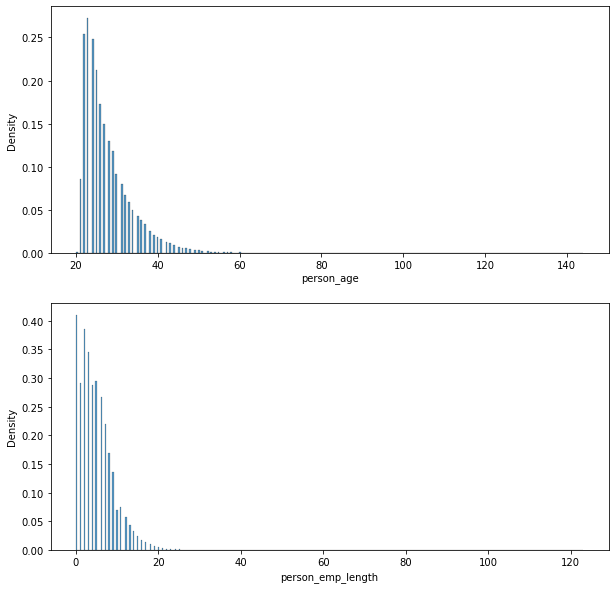

In [ ]:
#Determine outliers

thinkplot.PrePlot(2,2,1)
sns.histplot(df_credit['person_age'], stat = 'density')
thinkplot.SubPlot(2)
sns.histplot(df_credit['person_emp_length'], stat = 'density')

Looks like anything that is outside of 60 years old and 25 years of employment would be considered an outlier. That will be the cutoffs applied to the data.

In [ ]:
#Remove some outliers
df2_credit = df_credit
df2_credit = df2_credit[df2_credit["person_age"] < 60]
df2_credit = df2_credit[df2_credit["person_emp_length"] < 25]
df2_credit.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,31573.000000,3.157300e+04,31573,31573.00000,31573,31573,31573.000000,28541.000000,31573.000000,31573.000000,31573,31573.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16017,NaN,6281,10338,NaN,NaN,NaN,NaN,25968,NaN
mean,27.622494,6.634387e+04,NaN,4.76027,NaN,NaN,9652.487093,11.039293,0.215311,0.169591,NaN,5.754949
std,5.903414,5.084787e+04,NaN,3.96369,NaN,NaN,6327.620576,3.229219,0.411044,0.106254,NaN,3.944828
min,20.000000,4.000000e+03,NaN,0.00000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.927000e+04,NaN,2.00000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.599200e+04,NaN,4.00000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,8.000000e+04,NaN,7.00000,NaN,NaN,12475.000000,13.480000,0.000000,0.230000,NaN,8.000000


<AxesSubplot:xlabel='person_emp_length', ylabel='Density'>

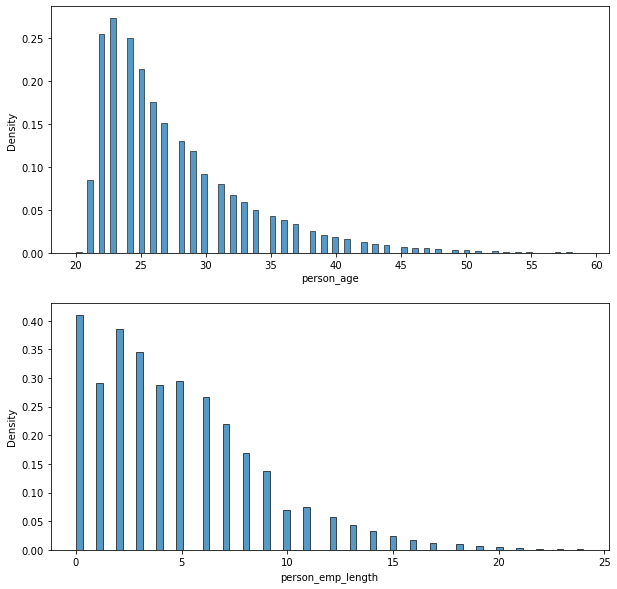

In [ ]:
thinkplot.PrePlot(2,2,1)
sns.histplot(df2_credit['person_age'], stat = 'density')
thinkplot.SubPlot(2)
sns.histplot(df2_credit['person_emp_length'], stat = 'density')

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#Change types of columns

df2_credit['person_home_ownership'] = df2_credit['person_home_ownership'].astype('category')
df2_credit['loan_intent'] = df2_credit['loan_intent'].astype('category')
df2_credit['loan_grade'] = df2_credit['loan_grade'].astype('category')
df2_credit['loan_status'] = df2_credit['loan_status'].astype('int64')
df2_credit['cb_person_default_on_file'] = df2_credit['cb_person_default_on_file'].astype('category')
df2_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31573 entries, 1 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  31573 non-null  int64   
 1   person_income               31573 non-null  int64   
 2   person_home_ownership       31573 non-null  category
 3   person_emp_length           31573 non-null  float64 
 4   loan_intent                 31573 non-null  category
 5   loan_grade                  31573 non-null  category
 6   loan_amnt                   31573 non-null  int64   
 7   loan_int_rate               28541 non-null  float64 
 8   loan_status                 31573 non-null  int64   
 9   loan_percent_income         31573 non-null  float64 
 10  cb_person_default_on_file   31573 non-null  category
 11  cb_person_cred_hist_length  31573 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.3 MB


In [ ]:
df2_credit.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3032
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df2_credit = df2_credit.dropna()
df2_credit.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<AxesSubplot:>

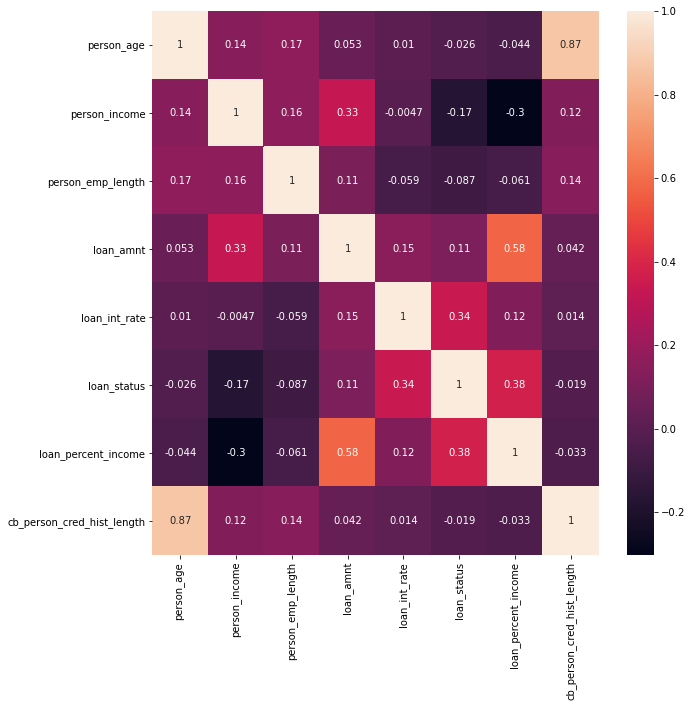

In [ ]:
sns.heatmap(df2_credit.corr() , annot = True)

Data Relevancy:
<li>Age doesn't seem very important to the data aside from Credit History Length.
<li>Income is only relevant alongside Loan Amount.
<li>Employment Length isn't very relevant.
<li>Loan Amount correlates with Income and Loan Percentage Income.
<li>Loan Interest Rate correlates somewhat with Loan Status.
<li>Loan Status correlates somewhat with Loan Interest Rate and Loan Percentage Income.
<li>Loan Percentage Income correlates with Loan Amount and somewhat with Loan Status.
<li>Credit History Length is only relevant alongside Age.
<br><br>
Hard to determine if any data can be removed.

<h3><b>Part 3 - Logistic Regression - Credit Data: Predict Loan Status</b></h3>

Do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

In [ ]:
df2_credit.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4


In [ ]:
df2_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28541 entries, 1 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28541 non-null  int64   
 1   person_income               28541 non-null  int64   
 2   person_home_ownership       28541 non-null  category
 3   person_emp_length           28541 non-null  float64 
 4   loan_intent                 28541 non-null  category
 5   loan_grade                  28541 non-null  category
 6   loan_amnt                   28541 non-null  int64   
 7   loan_int_rate               28541 non-null  float64 
 8   loan_status                 28541 non-null  int64   
 9   loan_percent_income         28541 non-null  float64 
 10  cb_person_default_on_file   28541 non-null  category
 11  cb_person_cred_hist_length  28541 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


In [ ]:
#baseline accuracy for loan status
1 - df2_credit["loan_status"].mean()

0.7835394695350548

In [ ]:
#Split data
credit_test, credit_train = train_test_split(df2_credit,test_size=0.3)

In [ ]:
#Define formula
form_credit = "loan_status ~ person_age + person_income + person_home_ownership + person_emp_length + loan_intent + loan_grade + loan_amnt + loan_int_rate + loan_percent_income + cb_person_default_on_file + cb_person_cred_hist_length"
model_credit = sm.logit(data = credit_train, formula = form_credit).fit()

#Make predictions for later, get summary for now
preds_credit = model_credit.predict(credit_test)
model_credit.summary()

Optimization terminated successfully.
         Current function value: 0.338266
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 8563
Model:                          Logit   Df Residuals:                     8540
Method:                           MLE   Df Model:                           22
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.3538
Time:                        10:50:17   Log-Likelihood:                -2896.6
converged:                       True   LL-Null:                       -4482.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -4.1324      0.379    -10.892      0.000      -4.876      -3.389
person_home_ownership[T.OTHER]     0.6343      0.557      1.139      0.255      -0.457       1.726
person_home_ownership[T.OWN]      -1.7502      0.207     -8.471      0.000      -2.155      -1.345
person_home_ownership[T.RENT]      0.8326      0.078     10.652      0.000       0.679       0.986
loan_intent[T.EDUCATION]          -0.9387      0.111     -8.451      0.000      -1.156      -0.721
loan_intent[T.HOMEIMPROVEMENT]     0.0917      0.123      0.748      0.454      -0.149       0.332
loan_intent[T.MEDICAL]            -0.2185      0.107     -2.033      0.042      -0.429      -0.008
loan_intent[T.PERSONAL]           -0.5614      0.111     -5.077      0.000      -0.778      -0.345
loan_intent[T.VENTURE]            -1.1515      0.120     -9.606      0.000      -1.386      -0.917
loan_grade[T.B]                    0.1833      0.152      1.206      0.228      -0.115       0.481
loan_grade[T.C]                    0.3891      0.229      1.703      0.089      -0.059       0.837
loan_grade[T.D]                    2.3825      0.286      8.326      0.000       1.822       2.943
loan_grade[T.E]                    2.7055      0.365      7.411      0.000       1.990       3.421
loan_grade[T.F]                    3.0809      0.491      6.273      0.000       2.118       4.044
loan_grade[T.G]                    5.5215      1.148      4.808      0.000       3.271       7.772
cb_person_default_on_file[T.Y]    -0.1118      0.097     -1.148      0.251      -0.303       0.079
person_age                        -0.0130      0.012     -1.078      0.281      -0.037       0.011
person_income                   3.038e-06   8.68e-07      3.500      0.000    1.34e-06    4.74e-06
person_emp_length                 -0.0189      0.009     -2.009      0.045      -0.037      -0.000
loan_amnt                         -0.0001   8.38e-06    -13.233      0.000      -0.000   -9.44e-05
loan_int_rate                      0.0820      0.033      2.482      0.013       0.017       0.147
loan_percent_income               13.3982      0.492     27.249      0.000      12.435      14.362
cb_person_cred_hist_length         0.0164      0.018      0.920      0.358      -0.019       0.051
==================================================================================================
"""

Anything with a high Pvalue indicates that predicition for that element isn't reliable. Could consider removing:
<br>
<li> person_home_ownership[T.OTHER]
<li> loan_intent[T.HOMEIMPROVEMENT
<li> loan_intent[T.MEDICAL
<li> loan_grade[T.B]
<li> loan_grade[T.C]
<li> loan_grade[T.G]
<li> cb_person_default_on_file[T.Y]
<li> person_age
<li> person_emp_length
<li> cb_person_cred_hist_length


In [ ]:
#Get the head of the predictions. 
preds_credit.head()

29830    0.124792
7787     0.360254
8047     0.256768
22514    0.677736
17733    0.725228
dtype: float64

In [ ]:
#Convert the probabilities to yes/no correctness
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [ ]:
labels = convert_prob_to_label(np.array(preds_credit))
labels[0:5]
#0 means unlikely, 1 means likely.

[0, 0, 0, 1, 1]

<AxesSubplot:>

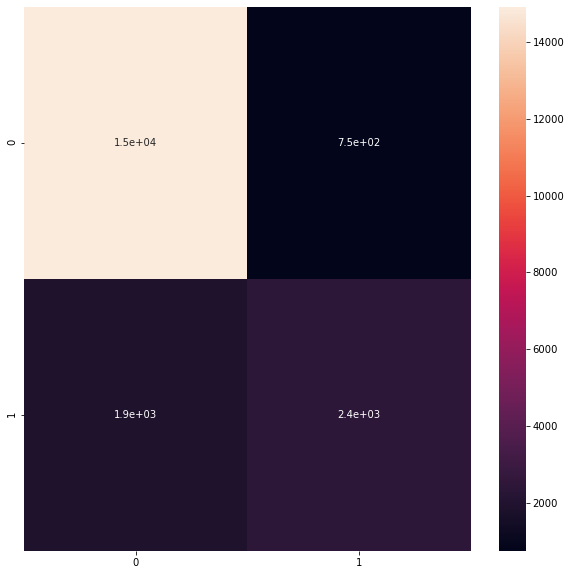

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_credit = confusion_matrix(credit_test["loan_status"], labels)
sns.heatmap(conf_matrix_credit, annot=True)

In [ ]:
#Create calc for misclassification rate. 
#We can look this up, but it is just adding up the errors and dividing. 
#The confusion matrix is an array, so we just need to grab the correct cells. 
#The is the compliment to the accuracy score, so we can just use library functions in general
mis_rate_credit = (conf_matrix_credit[[1],[0]].flat[0] + conf_matrix_credit[[0],[1]].flat[0])/len(credit_test)
print('Wrong Prediction % (FP + FN): ', mis_rate_credit)
print('Correct Prediciton %: ', accuracy_score(credit_test["loan_status"], labels))

Wrong Prediction % (FP + FN):  0.13129442386625287
Correct Prediciton %:  0.8687055761337471


In [ ]:
df3_credit = df2_credit
df3_credit = df3_credit[df3_credit["person_age"] < 60]
df3_credit = df3_credit[df3_credit["person_emp_length"] < 25]
df3_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
df3_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28541 entries, 1 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28541 non-null  int64   
 1   person_income               28541 non-null  int64   
 2   person_home_ownership       28541 non-null  category
 3   person_emp_length           28541 non-null  float64 
 4   loan_intent                 28541 non-null  category
 5   loan_grade                  28541 non-null  category
 6   loan_amnt                   28541 non-null  int64   
 7   loan_int_rate               28541 non-null  float64 
 8   loan_status                 28541 non-null  int64   
 9   loan_percent_income         28541 non-null  float64 
 10  cb_person_default_on_file   28541 non-null  category
 11  cb_person_cred_hist_length  28541 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


In [ ]:
df3_credittmp = pd.get_dummies(df3_credit, drop_first = True)
df3_credittmp.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0,0,...,0,0,0,1,0,0,0,0,0,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0,0,...,1,0,0,1,0,0,0,0,0,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0,0,...,0,1,0,0,0,0,0,0,0,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,1,...,0,0,1,0,0,1,0,0,0,0
10,22,85000,6.0,35000,10.37,1,0.41,4,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
y_credit3 = df3_credittmp["loan_status"]
x_credit3 = df3_credittmp.drop(columns={"loan_status"})

x3_credit = np.array(x_credit3)
y3_credit = np.array(y_credit3).reshape(-1,1)
x3_credit.shape, y3_credit.shape

((28541, 22), (28541, 1))

In [ ]:
x_traincredit3, x_testcredit3, y_traincredit3, y_testcredit3 = train_test_split(x3_credit, y3_credit, test_size=0.33)

In [ ]:
#Create scaler and choose method. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Comment one out, use the other
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [ ]:
#Standardize or normalize
#Use training data to fit the scaler, then apply that predefined scale to the test data
x3_credit = scaler.fit_transform(x_traincredit3)
x_transcredit3 = scaler.transform(x_testcredit3)
x3_credit[0:2]

array([[0.12820513, 0.03214485, 0.        , 0.07246377, 0.50561798,
        0.07228916, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.07692308, 0.05640669, 0.29166667, 0.39130435, 0.03426966,
        0.19277108, 0.07142857, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

#Train model
model_credit3 = LogisticRegression().fit(x3_credit, y_traincredit3.ravel())

#Make predictions
preds_credit3 = model_credit3.predict(x_transcredit3)

F1: 0.6228571428571429
Acc: 0.8598577343667057


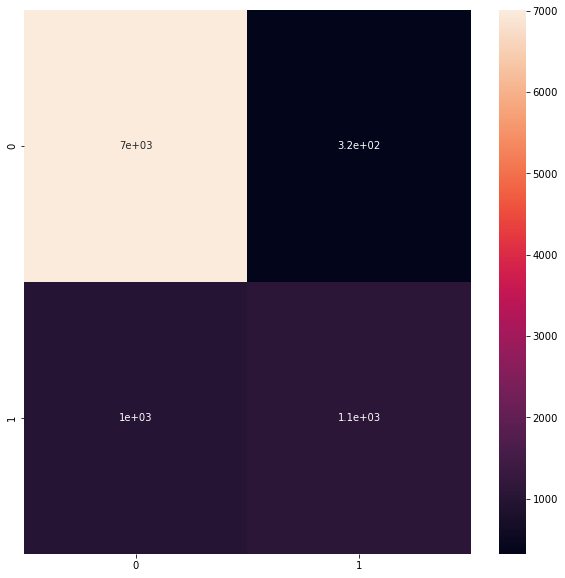

In [ ]:
#Generate 1/0 results and show results
labels_credit3 = convert_prob_to_label(np.array(preds_credit3))
conf_matrix_credit3 = confusion_matrix(y_testcredit3, labels_credit3)
sns.heatmap(conf_matrix_credit3, annot=True)

print("F1:",f1_score(y_testcredit3, labels_credit3)) # F1 score of 1 is best, 0 is worst.
print("Acc:",accuracy_score(y_testcredit3, labels_credit3))

<hr>

<h1>Part 4 - Are the Models Good?</h1>
<br>
Please briefly note if the models you've created are good. Justify your answer. 

Real Estate: The model produces a wide swing of RMSE and R2 values. It's not great and can't be used to predict prices accurately, but another method could produce more reliable results.
<br>
Credit: The model produces a good amount of correct predicitons (87%) with a wrong prediciton (13%) being within reasonable range. Further applying a scaler resulted in an F1 score of 62% and Accuracy of 86%. This would be considered an acceptable result of the model.